In [1]:
from load_data.utils import process_all_documents
from load_data import load_dataframe, process_text
from plots import plot_counter_lemmas
from plots.topics import interactive_exploration, plot_topics, plot_similarities
from topic_modeling.utils import check_coherence_for_topics_num, tsne_dim_reduction, umap_dim_reduction, _topics_df
from topic_modeling.lda_model import find_best_model, find_best_topics_num
from topic_modeling.topic_probs import (
    get_similarities,
    get_topic_probs,
    calculate_distance_matrix,
    calculate_linkage_matrix,
    topic_probs_by_column_binded,
)

import pandas as pd
from collections import Counter
import pickle

/Users/stanislaw/repos/PolicyComparison/.venv/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [4]:
necp_processed = pd.read_csv('./necp_reports/necp_processed.csv', index_col = 0)
necp_processed.drop(['start_page', 'end_page', 'start_text', 'end_text'], axis = 1, inplace = True)
necp_processed.drop(necp_processed[necp_processed.isnull()["text"]].index, axis = 0, inplace = True)

In [5]:
countries_stop_words = ['Austria', 'Austrian', 'Belgium', 'Belgian', 'Bulgaria', 'Bulgarian', 'Czech', 'Cyprus', 'Cypriot', 'Germany', 'German',
                      'Denmark', 'Danish', 'Estonia', 'Estonian', 'Croatia', 'Croatian', 'Finland', 'Finnish', 'France', 'French', 'Malta', 'Maltese',
                      'Luxembourg', 'Lithuania', 'Lithuanian', 'Latvia', 'Latvian', 'Italy', 'Italian', 'Ireland', 'Irish', 'Hungary', 'Hungarian',
                      'Greece', 'Greek', 'Spain', 'Spanish', 'Netherlands', 'Dutch', 'Poland', 'Polish', 'Portugal', 'Portuguese', 'Romania', 'Romanian',
                      'Sweden', 'Swedish', 'Slovenia', 'Slovenian', 'Slovakia', 'Slovak']
extra_stop_words =  ['energy', 'figure', 'table', 'plan', "necp", 'national', 'use', "measure", "sector", "climate",
                     "plan", "dimension", "integrated", "section", "republic", "measures", "policies", "target", "objective", "policy",
                     "projection", "assessment", "federal", "government"]
stop_words = [c.lower() for c in countries_stop_words]
stop_words.extend(extra_stop_words)

In [7]:
df = pd.DataFrame(columns=["paragraph", "country", "text_path", "text", "tokens", "lemmas"])
df["country"] = necp_processed["country"]
df["text"] = necp_processed["text"]
df["paragraph"] = [row[1]["subsection"] if row[1]["subsection"] in ["Overview and Process for Establishing the Plan", "Impact Assessment of Planned Policies and Measures"] else row[1]["energy_union_dimension"] for row in necp_processed.iterrows()]
processed_df = process_text(df, spacy_model="en_core_web_md",  stop_words=stop_words)

/Users/stanislaw/repos/PolicyComparison/.venv/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/stanislaw/repos/PolicyComparison/.venv/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/stanislaw/repos/PolicyComparison/.venv/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/stanislaw/repos/PolicyComparison/.venv/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_EN

In [8]:
paragraphs = ["Overview and Process for Establishing the Plan",
              "Impact Assessment of Planned Policies and Measures",
              "Decarbonisation",
              "Energy efficiency",
              "Energy security",
              "Internal market",
              "R&I and Competitiveness"]
common_words = {}

### Paragraph: Overview and Process for Establishing the Plan

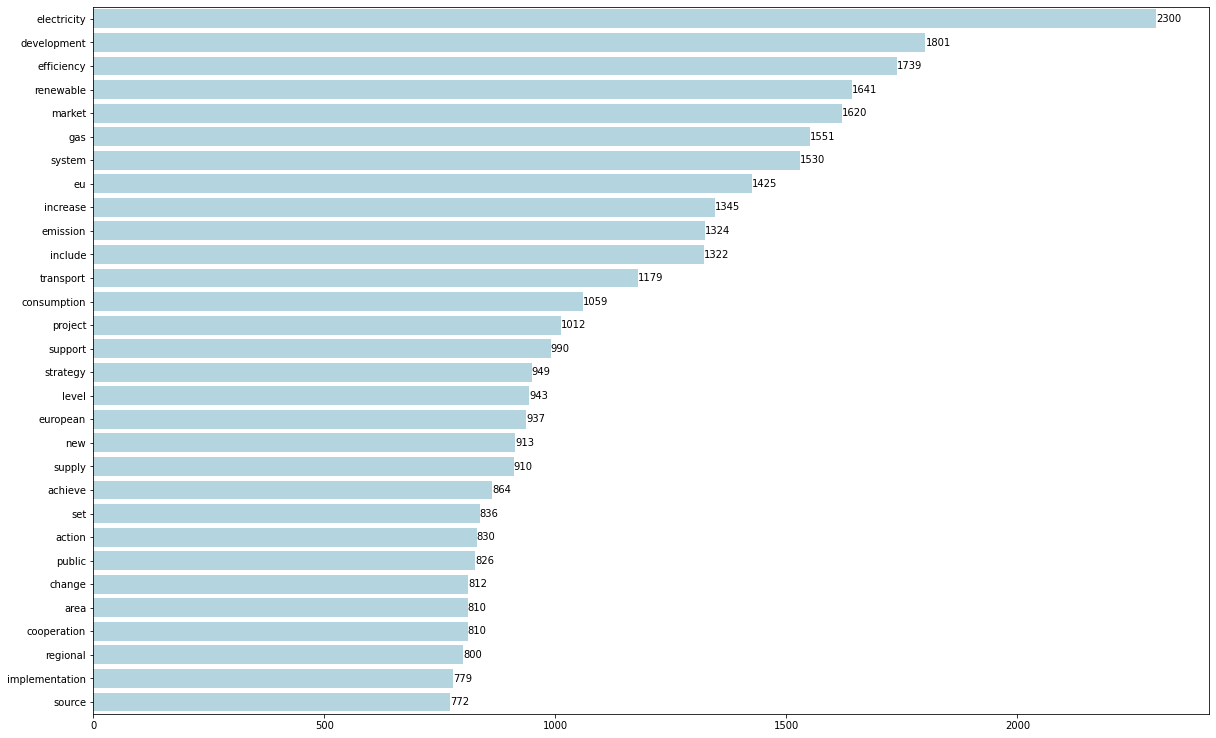

In [11]:
filter_dict = {'paragraph':paragraphs[0]}
plot_counter_lemmas(processed_df, filter_dict)

In [12]:
filtered_lemmas = processed_df.loc[(processed_df[list(filter_dict)] == pd.Series(filter_dict)).all(axis=1)]["lemmas"]
counter = Counter(filtered_lemmas.sum()).most_common(1)
common_words[paragraphs[0]] = [word for word, cnt in counter]

### Paragraph: Impact Assessment of Planned Policies and Measures

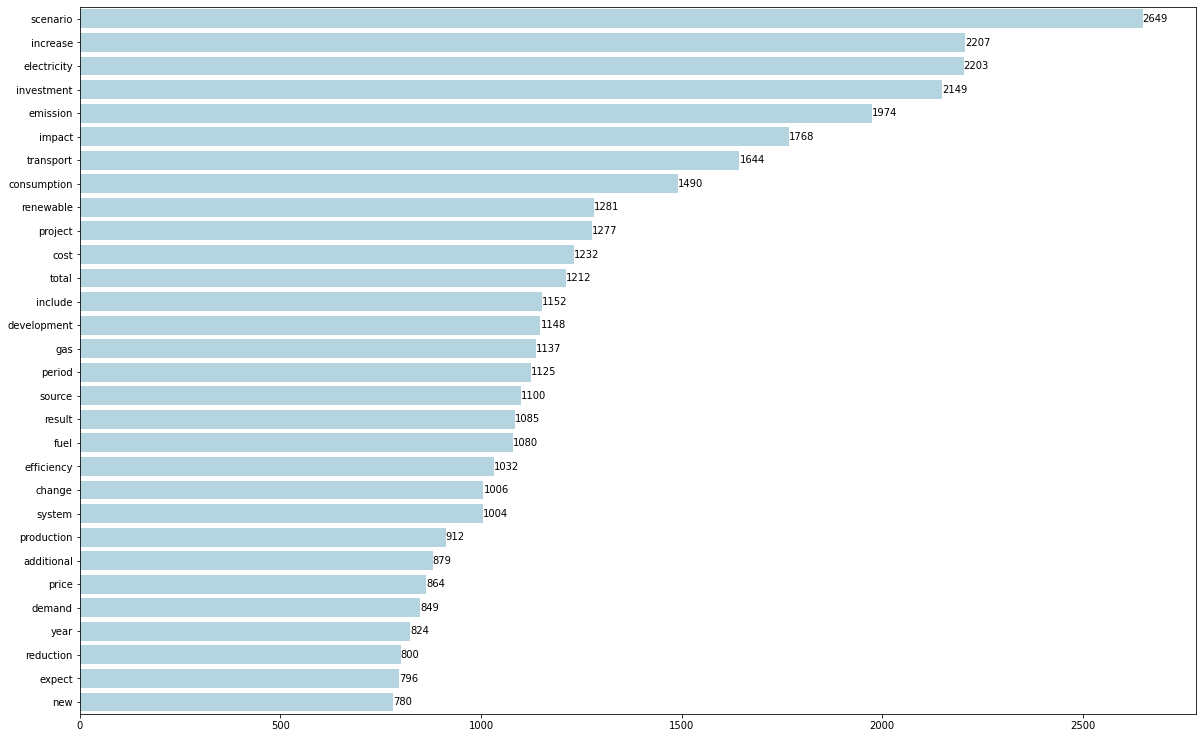

In [13]:
filter_dict = {'paragraph':paragraphs[1]}
plot_counter_lemmas(processed_df, filter_dict)

In [14]:
filtered_lemmas = processed_df.loc[(processed_df[list(filter_dict)] == pd.Series(filter_dict)).all(axis=1)]["lemmas"]
counter = Counter(filtered_lemmas.sum()).most_common(3)
common_words[paragraphs[1]] = [word for word, cnt in counter]

### Paragraph: Decarbonisation

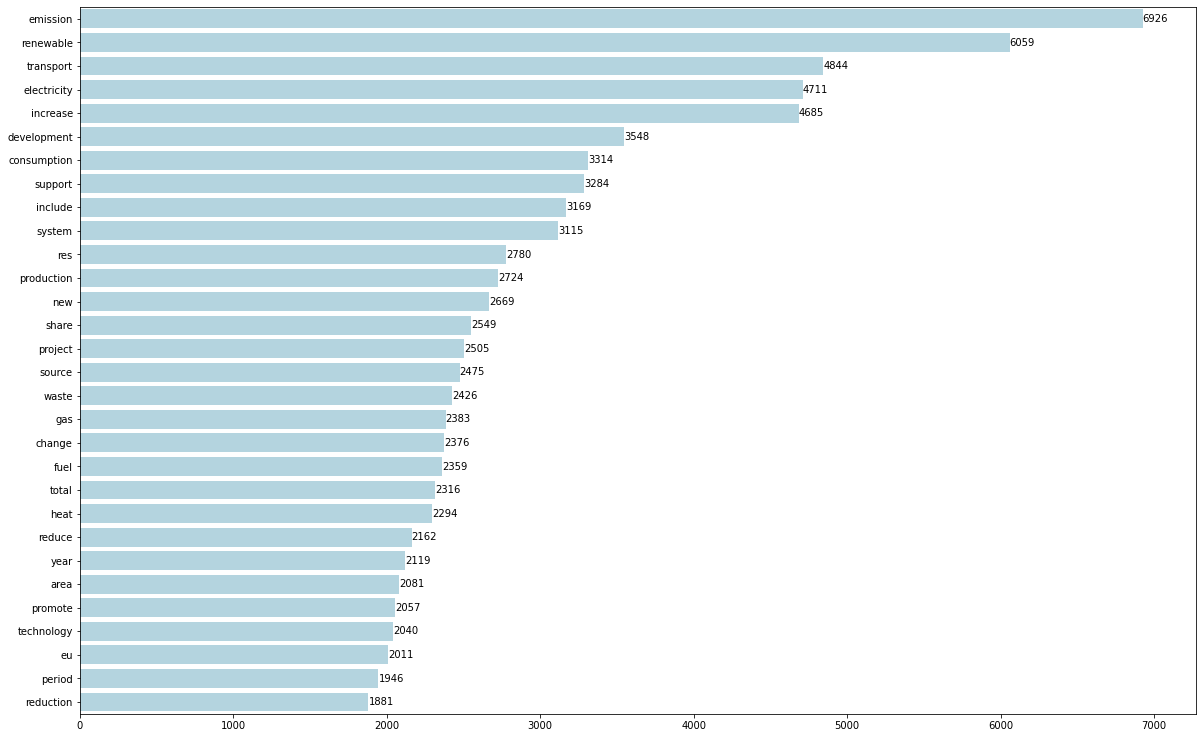

In [15]:
filter_dict = {'paragraph':paragraphs[2]}
plot_counter_lemmas(processed_df, filter_dict)

In [16]:
filtered_lemmas = processed_df.loc[(processed_df[list(filter_dict)] == pd.Series(filter_dict)).all(axis=1)]["lemmas"]
counter = Counter(filtered_lemmas.sum()).most_common(5)
common_words[paragraphs[2]] = [word for word, cnt in counter]

### Paragraph: Energy efficiency

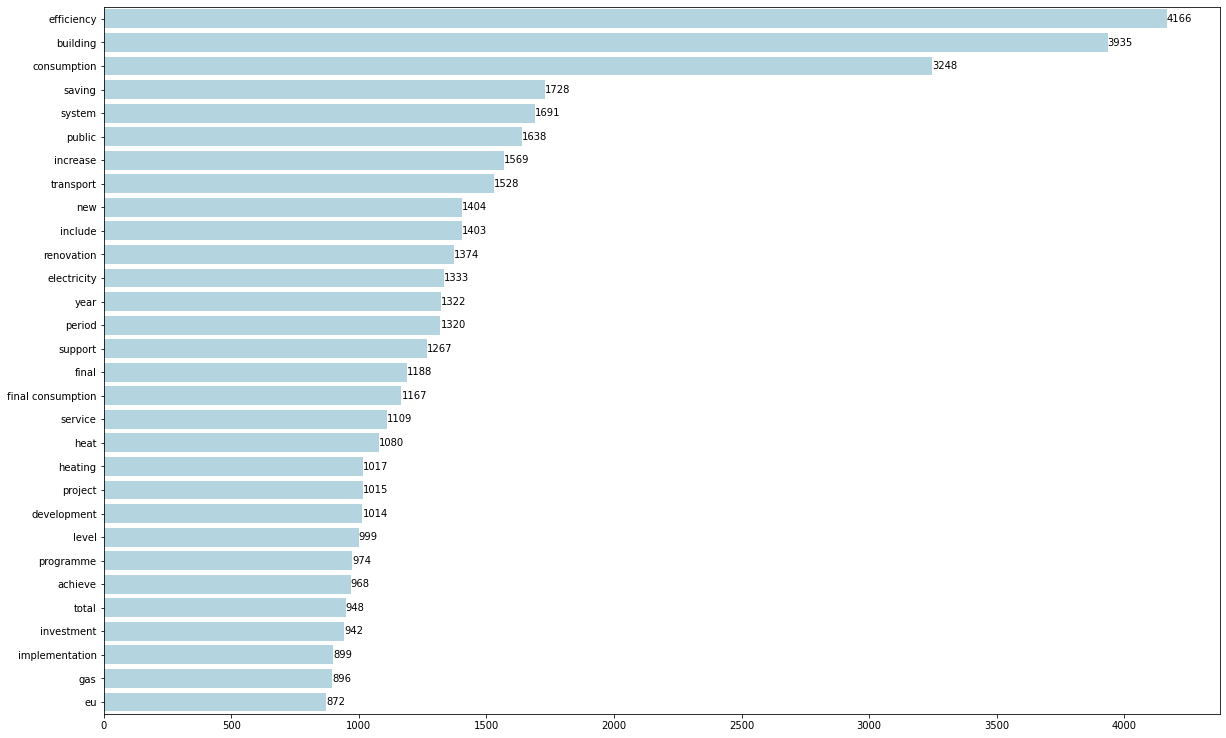

In [17]:
filter_dict = {'paragraph':paragraphs[3]}
plot_counter_lemmas(processed_df, filter_dict)

In [18]:
filtered_lemmas = processed_df.loc[(processed_df[list(filter_dict)] == pd.Series(filter_dict)).all(axis=1)]["lemmas"]
counter = Counter(filtered_lemmas.sum()).most_common(3)
common_words[paragraphs[3]] = [word for word, cnt in counter]

### Paragraph: Energy security

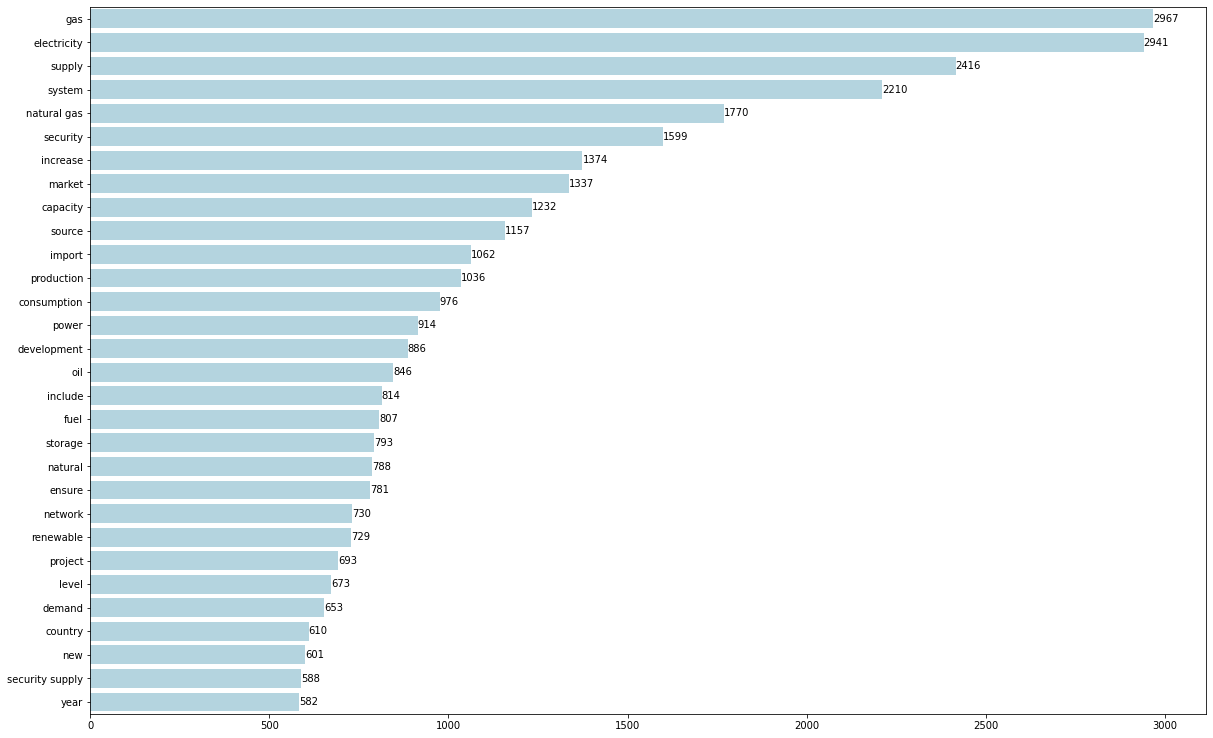

In [19]:
filter_dict = {'paragraph':paragraphs[4]}
plot_counter_lemmas(processed_df, filter_dict)

In [20]:
filtered_lemmas = processed_df.loc[(processed_df[list(filter_dict)] == pd.Series(filter_dict)).all(axis=1)]["lemmas"]
counter = Counter(filtered_lemmas.sum()).most_common(2)
common_words[paragraphs[4]] = [word for word, cnt in counter]

### Paragraph: Internal market

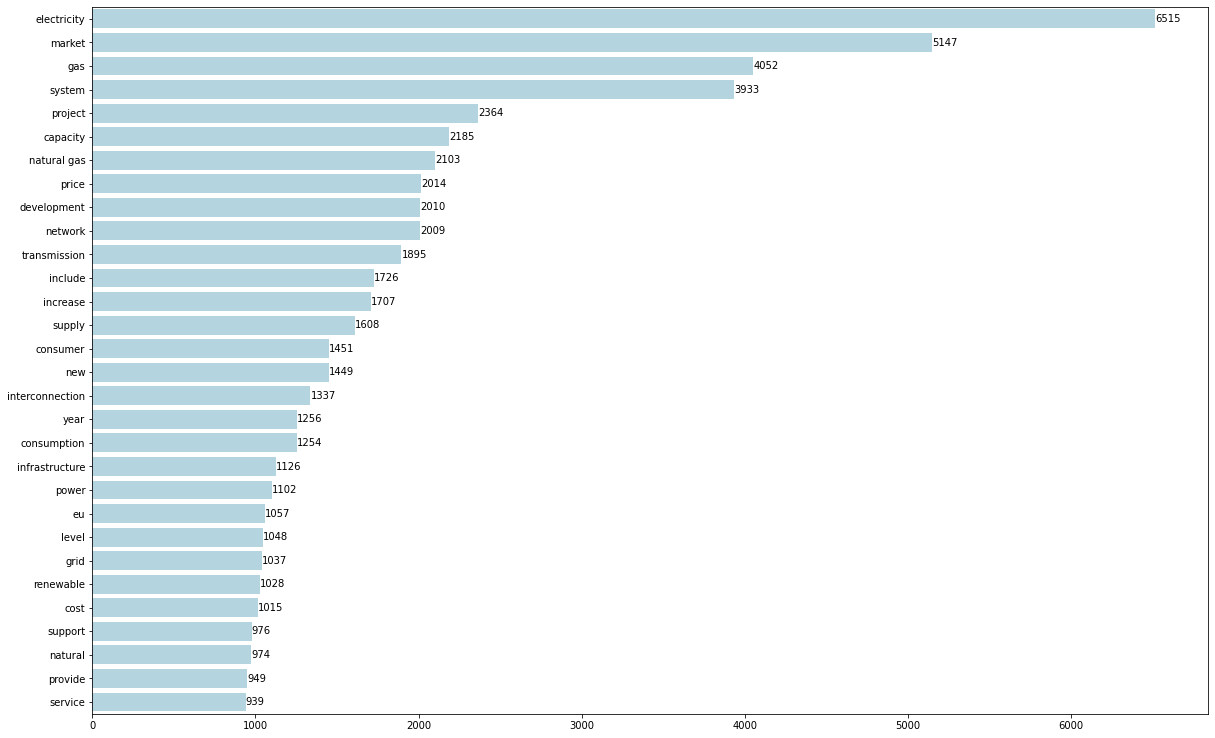

In [21]:
filter_dict = {'paragraph':paragraphs[5]}
plot_counter_lemmas(processed_df, filter_dict)

In [22]:
filtered_lemmas = processed_df.loc[(processed_df[list(filter_dict)] == pd.Series(filter_dict)).all(axis=1)]["lemmas"]
counter = Counter(filtered_lemmas.sum()).most_common(4)
common_words[paragraphs[5]] = [word for word, cnt in counter]

### Paragraph: R&I and Competitiveness

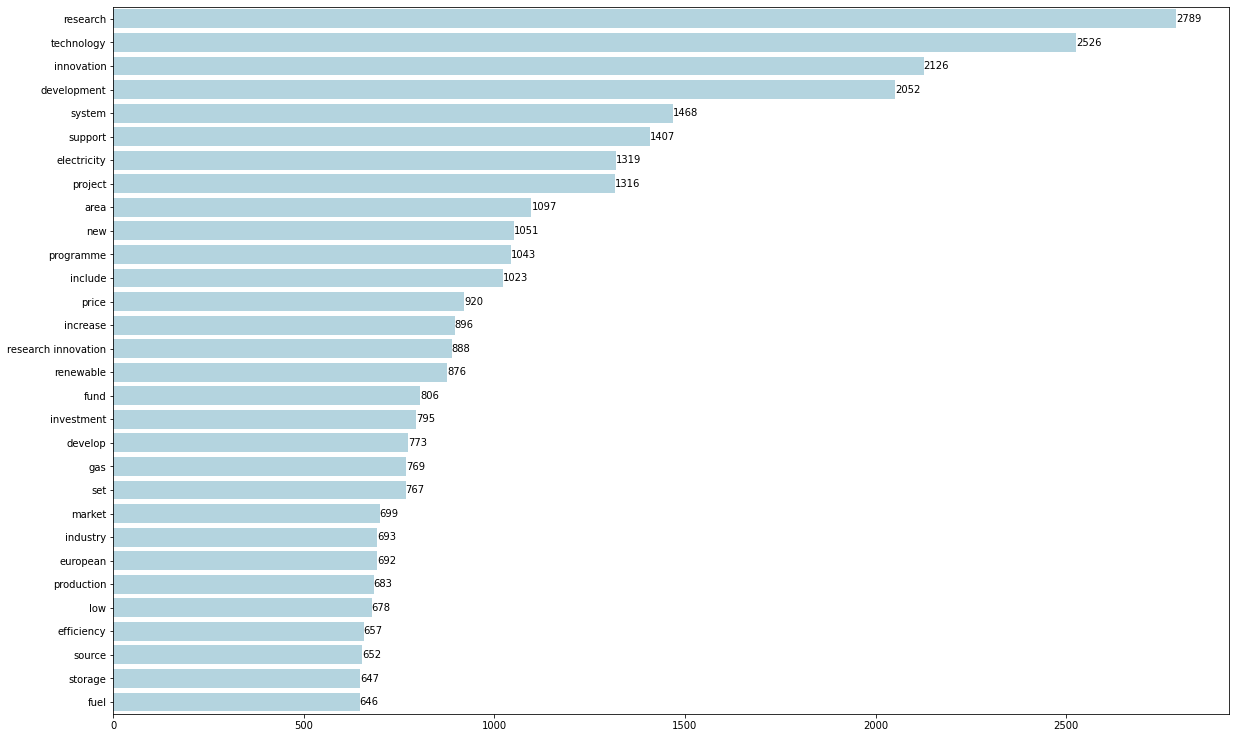

In [23]:
filter_dict = {'paragraph':paragraphs[6]}
plot_counter_lemmas(processed_df, filter_dict)

In [24]:
filtered_lemmas = processed_df.loc[(processed_df[list(filter_dict)] == pd.Series(filter_dict)).all(axis=1)]["lemmas"]
counter = Counter(filtered_lemmas.sum()).most_common(3)
common_words[paragraphs[6]] = [word for word, cnt in counter]

In [25]:
topic_numbers_range = (3, 10)

In [10]:
from topic_modeling import utils

In [34]:
from gensim.models.ldamulticore import LdaMulticore

filtered_lemmas = utils.get_filtered_lemmas(processed_df, filter_dict, [])
lemmas_dictionary = utils.get_lemmas_dictionary(filtered_lemmas)
encoded_docs = filtered_lemmas.apply(lemmas_dictionary.doc2bow)

model=LdaMulticore(
    encoded_docs,
    num_topics=5,
    passes=8,
    iterations=50,
    random_state=123,
    alpha="symmetric",
)

In [36]:
results = model[encoded_docs]

In [138]:
from collections import defaultdict

In [194]:
from typing import List, Tuple


def get_sentences_to_topics(tokens, model, minimal_sent_len)->List[Tuple[str, List[float]]]:
    sentence_to_topics=defaultdict(list)
    id_to_sent = {}
    for token in tokens:
        try:
            tok_id = lemmas_dictionary.token2id[token.lemma_.lower()]
        except KeyError:
            continue
        sent_id = token.sent.start
        sentence_topics = model.get_term_topics(tok_id,0)
        sentence_topics = [prob for _, prob in sentence_topics]
        sentence_to_topics[sent_id].append(sentence_topics)
        if sent_id not in id_to_sent:
            id_to_sent[sent_id] = str(token.sent)

    results = [(id_to_sent[key],value) for key, value in sentence_to_topics.items() if len(value)>minimal_sent_len]
    
    return results

In [196]:
results = get_sentences_to_topics(tokens, model, 3)

results

[('Greenhouse gas emissions and carbon sequestration   i.  Sharing Regulation  As required by Regulation (EU) 2018/842 on binding annual greenhouse gas emission reductions emissions in non-ETS sectors by 36% by 2030 compared to 2005.',
  [[(0, 0.00046048715),
    (1, 0.00035245394),
    (2, 1.8257573e-05),
    (3, 0.00037331966),
    (4, 0.00064830866)],
   [(0, 0.0026232712),
    (1, 0.011485926),
    (2, 0.0048256153),
    (3, 0.0009724371),
    (4, 0.0013458504)],
   [(0, 0.0021144203),
    (1, 0.0031243488),
    (2, 0.0012126957),
    (3, 0.0017747546),
    (4, 0.0035918893)],
   [(0, 0.0034235287),
    (1, 0.003562401),
    (2, 0.0009231066),
    (3, 0.0024242594),
    (4, 0.0048737405)],
   [(0, 1.555078e-05),
    (1, 6.168057e-05),
    (2, 2.6461652e-05),
    (3, 3.204869e-07),
    (4, 0.00023337777)],
   [(0, 0.00081916543),
    (1, 0.0029312847),
    (2, 0.0009757786),
    (3, 0.001147594),
    (4, 0.00065899774)],
   [(0, 0.0006498965),
    (1, 0.0016531374),
    (2, 0.000803

In [169]:
tokens = processed_df['tokens'][1]

In [190]:
import numpy as np


results = get_sentences_to_topics(tokens, model, 3)
sent_to_topics = {}
for sent, distrs in results:
    distrs = np.array(distrs)
    sent_to_topics[sent]=distrs[:,:,1].mean(axis=0)

In [187]:
def get_top_sents(sent_to_topics: dict, topic_id: int, top_sents: int=3):
    a = [(sent, probs[topic_id]) for sent, probs in sent_to_topics.items()]
    return sorted(a, key=lambda x: x[1],reverse=True)[:top_sents]

In [188]:
get_top_sents(sent_to_topics, 1)

[(' Another objective is to generate 100% of total electricity consumption (national balance) from domestic renewable energy sources by 2030.',
  0.006350981941068312),
 (' The objective is to generate 100% of total electricity consumption (national balance) from domestic renewable energy sources by 2030.',
  0.006350981941068312),
 ('This expansion takes into account the anticipated increase in electricity consumption, as electricity from renewable sources in Austria will be used in the mobility, building and production sectors to replace imported fossil fuels.',
  0.005041311481363664)]

In [156]:
import numpy as np


distrs = np.array(distrs)

In [74]:
for doc in encoded_docs:
    for word in doc:
        id, freq = word
        model.get_term_topics(id)

5      [(0, 3), (1, 1), (2, 2), (3, 1), (4, 3), (5, 3...
10     [(0, 3), (2, 4), (3, 1), (4, 1), (5, 10), (6, ...
15     [(0, 7), (3, 2), (6, 2), (8, 3), (9, 1), (16, ...
22     [(4, 2), (5, 2), (8, 3), (9, 2), (18, 6), (23,...
27     [(0, 4), (3, 4), (4, 8), (5, 28), (6, 14), (8,...
                             ...                        
435    [(3, 2), (4, 2), (5, 2), (8, 1), (16, 5), (23,...
440    [(0, 3), (3, 3), (4, 2), (5, 2), (8, 2), (12, ...
447    [(3, 2), (4, 2), (5, 8), (8, 1), (9, 2), (10, ...
452    [(4, 2), (12, 2), (18, 2), (28, 8), (30, 2), (...
457    [(3, 4), (4, 3), (5, 3), (9, 2), (12, 1), (16,...
Name: lemmas, Length: 80, dtype: object

In [77]:
model.get_term_topics(1, 0)

[(0, 5.892765e-06),
 (1, 0.00021154457),
 (2, 3.7462356e-05),
 (3, 5.720368e-05),
 (4, 1.30285025e-05)]

In [73]:
model.get_term_topics()

Signature: model.get_term_topics(word_id, minimum_probability=None)
Docstring:
Get the most relevant topics to the given word.

Parameters
----------
word_id : int
    The word for which the topic distribution will be computed.
minimum_probability : float, optional
    Topics with an assigned probability below this threshold will be discarded.

Returns
-------
list of (int, float)
    The relevant topics represented as pairs of their ID and their assigned probability, sorted
    by relevance to the given word.
File:      ~/repos/PolicyComparison/.venv/lib/python3.10/site-packages/gensim/models/ldamodel.py
Type:      method


In [70]:
for i, row in enumerate(results):
    print(len(row))

3
1
2
1
2
4
3
4
2
1
1
1
3
3
1
2
1
1
1
3
1
2
2
1
4
3
1
3
3
1
4
4
3
2
2
4
2
2
4
2
1
4
2
3
1
4
4
2
4
2
2
3
4
1
2
1
3
1
2
1
2
1
1
2
3
3
3
2
3
4
5
1
2
2
2
3
2
3
2
1


In [68]:
len(row)

1

In [ ]:
def do_pipeline(par, alpha):
    print(f"Pipeline for {par} with alpha={alpha} started")
    filter_dict = {'paragraph': par}
    (filtered_lemmas, models, encoded_docs, lemmas_dictionary, cvs) = check_coherence_for_topics_num(
        processed_df,
        filter_dict,
        common_words[par],
        topic_numbers_range,
        alpha
    )
    num_topics = find_best_topics_num(cvs, topic_numbers_range)
    print(f"Best number of topics found: {num_topics}")
    lda_model = find_best_model(encoded_docs, lemmas_dictionary, cvs, topic_numbers_range, random_state=42, alpha=alpha)
    encoded_docs.to_csv(str(alpha) + "_" + par.replace(" ", "_") +"_encoded_docs.csv")
    lemmas_dictionary.save(str(alpha) + "_" + par.replace(" ", "_") +"_dictionary.dict")
    lda_model.save(str(alpha) + "_" + par.replace(" ", "_") +"_lda_model.model")
    print("Best model found and saved")
    topic_words = _topics_df(lda_model, filtered_lemmas, 30)
    modeling_results, topic_probs = get_topic_probs(processed_df, filter_dict, lda_model, num_topics, encoded_docs)
    topics_by_country = topic_probs_by_column_binded(modeling_results, num_topics, column='country')
    result = tsne_dim_reduction(topics_by_country, num_topics * 3, perplexity=10)
    result[["u1", "u2"]] = umap_dim_reduction(result.iloc[:,:(num_topics * 3 + 1)], num_topics * 3, random_state=42)[["c1", "c2"]]
    result.to_csv(str(alpha) + "_" + par.replace(" ", "_") +"_probs.csv")
    topic_words.to_csv(str(alpha) + "_" + par.replace(" ", "_") +"_topic_words.csv")

In [ ]:
for alpha in [50, 100, 150, 200, 250]:
    for par_idx in range(7):
        do_pipeline(paragraphs[par_idx], alpha)

In [ ]:
from topic_modeling.topic_names import _generate_prompt, _generate_title
import openai
import os
openai.api_key = os.getenv("OPENAI_API_KEY")
gpt3_model = "text-davinci-002"
temperature = 0.6

In [ ]:
import glob 
import numpy as np
from tqdm import tqdm
result_files_list = glob.glob("./climate_results/*probs.csv")

In [ ]:
import time

In [ ]:
for result_file in tqdm(result_files_list): 
    topic_df = pd.read_csv(result_file)
    topic_keywords = pd.read_csv(result_file.replace("probs", "topic_words"))
    colnames = topic_df.columns.to_list()
    topic_colnames = colnames[1:-4]
    one_section_flag = False
    if "Overview" in result_file or "Impact" in result_file:
        one_section_flag = True
        n_topics = len(topic_colnames)
    else:
        n_topics = int(len(topic_colnames)/3)
    for i, colname in enumerate(topic_colnames[:n_topics]):
        time.sleep(1)
        n_keywords = np.min([np.sum(topic_keywords["topic_id"] == int(colname)), 25])
        keywords = topic_keywords[topic_keywords["topic_id"] == int(colname)].word.to_list()[:n_keywords]
        weights = topic_keywords[topic_keywords["topic_id"] == int(colname)].importance.to_list()[:n_keywords]
        prompt = _generate_prompt(keywords, weights) 
        title = _generate_title(prompt, gpt3_model, temperature)
        topic_colnames[i] = title
    if not one_section_flag:
        topic_colnames_final = []
        for subsection in ["NO&T ", "P&M ", "CS&RP "]:
            topic_colnames_final += [subsection + topic_name for topic_name in topic_colnames[:n_topics]]
        topic_colnames = topic_colnames_final
    colnames[1:-4] = topic_colnames
    topic_df.columns = colnames
    topic_df.to_csv(result_file, index=False)

In [ ]:
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary
import ast
import pyLDAvis
for result_file in tqdm(result_files_list): 
    lda_model = LdaModel.load(result_file.replace("_probs.csv", "_lda_model.model"))
    encoded_docs = pd.read_csv(result_file.replace("_probs.csv", "_encoded_docs.csv")).set_index("Unnamed: 0")
    encoded_docs.index.name = None
    encoded_docs = encoded_docs.lemmas
    encoded_docs = encoded_docs.apply(lambda x: ast.literal_eval(x))
    lemmas_dictionary = Dictionary.load(result_file.replace("_probs.csv", "_dictionary.dict"))
    vis = pyLDAvis.gensim_models.prepare(lda_model, encoded_docs, lemmas_dictionary)
    vis_html_string = pyLDAvis.prepared_data_to_html(vis)
    with open(result_file.replace("_probs.csv", "_vis.txt"), "w") as text_file:
        text_file.write(vis_html_string)